In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
sns.set()

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

## Test - Train - Split

X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state=123)

In [3]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=LassoCV(cv=5, random_state=123)).fit(
    X_train_sc, y_train)
#mask = selector.get_support()

## Resultate anzeigen
## tbd: kontrollieren, ob dieser Data Frame wirklich gebraucht wird, oder nur anzeigen
##   dann allerdings auch gleich sortiert
print(pd.DataFrame({
    'Feature': X_train.columns,
    'coeff' : selector.estimator_.coef_,
    'mask' : selector.get_support()}). \
      sort_values(by=['coeff'], ascending = False))

## Redzuierte Data Frames erzeugen (train und test)
X_train_red = X_train.loc[:, selector.get_support()]
X_test_red = X_test.loc[:, selector.get_support()]

                             Feature        coeff   mask
21                 hometeam_FC Basel  5437.798589   True
19           hometeam_BSC Young Boys  2807.225638   True
27            hometeam_FC St. Gallen  1663.261303   True
26                  hometeam_FC Sion   945.616218   True
31                hometeam_FC Zürich   887.294210   True
24                hometeam_FC Luzern   726.017589   True
1                             season   700.741675   True
38                 awayteam_FC Basel   619.602124   True
34          hometeam_Servette Genève   588.371126   True
48                awayteam_FC Zürich   251.230880   True
16                   weekday_Sonntag   239.000671   True
51          awayteam_Servette Genève   186.578345   True
9                          form_home   128.856812   True
36           awayteam_BSC Young Boys    83.004892   True
3                        points_home    82.912570   True
14                    weekday_Montag    67.132848   True
12                   weekday_Fr

In [5]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_red)
X_train_red_sc = scaler.transform(X_train_red)
X_test_red_sc = scaler.transform(X_test_red)

100 0.9012567411739687
150 0.9012085232748733
200 0.9019885607642353
250 0.901899460165923
300 0.9017295197272511
350 0.9014062710511093
400 0.9012818568739132
450 0.9012008269051701
best_val   =  200
best_score =  0.9019885607642353


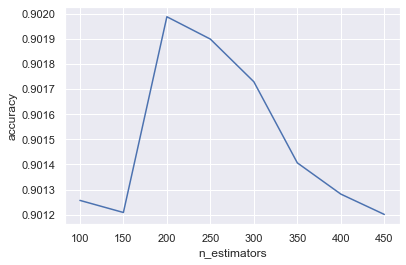

In [6]:
from sklearn.ensemble import RandomForestRegressor
scores = []
best_val = 0
best_score = 0
nes = np.arange(100, 500, 50)

for ne in nes:
    model = RandomForestRegressor(n_estimators = ne, random_state = 123)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = ne
    print(ne, score)

fig = sns.lineplot(x=nes, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

1 0.7975037000349019
2 0.8263039788404816
3 0.8437085410155611
4 0.853624081771083
5 0.8584997043504015
6 0.8644753725968521
7 0.8692409543387065
8 0.872235150081647
9 0.8737999716371104
10 0.8730846451273065
11 0.8774684226454753
12 0.8811741690754672
13 0.8833093892223672
14 0.8817828989607145
15 0.8834969183425719
16 0.8860452563254042
17 0.8867447460379869
18 0.8871311471720336
19 0.8886564024383309
20 0.8903799556105373
21 0.8899206939540032
22 0.8925767551118564
23 0.8927420158786614
24 0.8907523408300793
25 0.892843044957758
26 0.8938075554397461
27 0.8952647753272428
28 0.8950481173925189
29 0.8965420275849624
30 0.8963563211391457
31 0.8972562867854538
32 0.8956617757765296
33 0.8963441531308965
34 0.8972206611024355
35 0.8978165483620917
36 0.899506834044178
37 0.8985009976180298
38 0.9010880856949581
39 0.9000026333057103
40 0.9003115408908181
41 0.899471454627966
42 0.9007340257935706
43 0.900166106600255
44 0.9010566234596438
45 0.9002966143460234
46 0.9003265654278373
47 

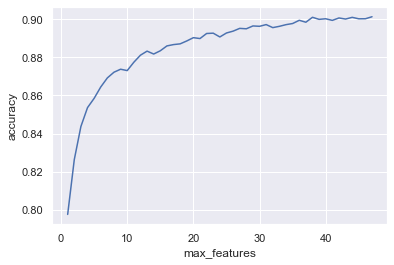

In [16]:
#Bester Wert bei 200
scores = []
best_val = 0
best_score = 0
mfs = range(1, 48)

for mf in mfs:
    model = RandomForestRegressor(n_estimators= 200, max_features = mf, random_state = 1234)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = mf
    print(mf, score)


fig = sns.lineplot(x=mfs, y=scores)
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

0.0 0.9019885607642353
0.05 0.9018316067902227
0.1 0.9017048066698086
0.15000000000000002 0.9019511519856163
0.2 0.9018406370308689
0.25 0.9017374733755817
0.30000000000000004 0.9017275019987134
0.35000000000000003 0.9019109369582994
0.4 0.9018490060800276
0.45 0.9020175992168815
0.5 0.9021121090020996
0.55 0.9022013871933564
0.6000000000000001 0.9024540422246241
0.65 0.9026603360193425
0.7000000000000001 0.9025579062101454
0.75 0.9022463476114602
0.8 0.9022349459727602
0.8500000000000001 0.9023083438686866
0.9 0.9025310855682442
0.9500000000000001 0.9023795241067896
best_val   =  0.65
best_score =  0.9026603360193425


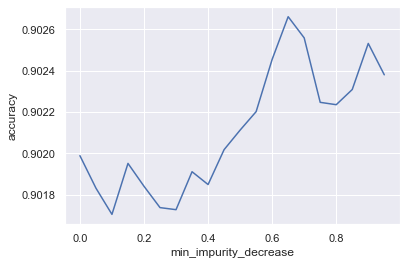

In [17]:
# Bester Wert: keiner

scores = []
best_val = 0
best_score = 0
mids = np.arange(0, 1, 0.05)
score = 0

for mid in mids:
    model = RandomForestRegressor(n_estimators= 200, min_impurity_decrease = mid, random_state = 123)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = mid
    print(mid, score)

fig = sns.lineplot(x=mids, y=scores)
plt.xlabel('min_impurity_decrease')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

100 0.9022335108323066
150 0.9024331072728586
200 0.9026750091286171
250 0.9019313300611993
300 0.9016624970482814
350 0.9011512790085046
400 0.9011365271715682
450 0.9013360018945688
best_val   =  200
best_score =  0.9026750091286171


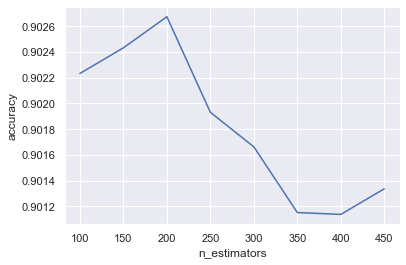

In [7]:
#Bester Wert varriert nach random state. wahrscheinlich 0 am geeignetsten


scores = []
best_val = 0
best_score = 0
nes = np.arange(100, 500, 50)

for ne in nes:
    model = RandomForestRegressor(n_estimators = ne, random_state = 123)
    model.fit(X_train_red_sc, y_train)
    score = model.score(X_test_red_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = ne
    print(ne, score)

fig = sns.lineplot(x=nes, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)